In [ ]:
!pip install web3==5.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of eth-utils to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 501.5/501.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 50.4 MB/s eta 0:00:00
  Created wheel for 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from web3 import Web3
from web3.middleware import geth_poa_middleware
import matplotlib.pyplot as plt

In [ ]:
# Load the synthetic CNC machine dataset
dataset_path = '/content/cnc_machine_data.csv'
data = pd.read_csv(dataset_path)

In [ ]:
# Split dataset into features and labels
X = data[['vibration', 'temperature', 'load']]
y = data['maintenance_needed']

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Test the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy * 100:.2f}%')

# Additional metrics (optional)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix (optional)
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion)

Accuracy: 95.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       162
           1       0.94      0.82      0.87        38

    accuracy                           0.95       200
   macro avg       0.95      0.90      0.92       200
weighted avg       0.95      0.95      0.95       200


Confusion Matrix:
[[160   2]
 [  7  31]]


In [ ]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("\nFeature ranking:")
for i in range(len(X.columns)):
    print(f"Feature {indices[i]}: {importances[indices[i]]}")


Feature ranking:
Feature 0: 0.6015490515339337
Feature 1: 0.21695182210609373
Feature 2: 0.18149912635997267


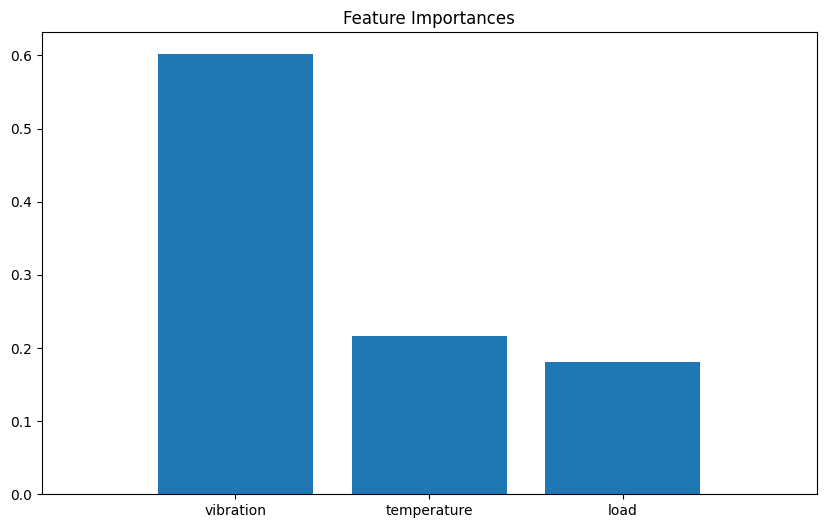

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Blockchain setup
w3 = Web3(Web3.HTTPProvider(' https://dcbd-27-60-174-189.ngrok-free.app'))
w3.middleware_onion.inject(geth_poa_middleware, layer=0)

# Check connection
if not w3.isConnected():
    print("Failed to connect to Ethereum network.")
    exit()
else:
    print("Connected to Ganache!")

Connected to Ganache!


In [ ]:
# Set up your contract
contract_address = '0x1258Aa13C8F66ddd2Bc6f8bdbaC2435356Fed8CA'
abi = '''[
	{
		"inputs": [
			{
				"internalType": "string",
				"name": "_machineId",
				"type": "string"
			},
			{
				"internalType": "bool",
				"name": "_maintenanceNeeded",
				"type": "bool"
			}
		],
		"name": "logPrediction",
		"outputs": [],
		"stateMutability": "nonpayable",
		"type": "function"
	},
	{
		"anonymous": false,
		"inputs": [
			{
				"indexed": false,
				"internalType": "uint256",
				"name": "id",
				"type": "uint256"
			},
			{
				"indexed": false,
				"internalType": "string",
				"name": "machineId",
				"type": "string"
			},
			{
				"indexed": false,
				"internalType": "bool",
				"name": "maintenanceNeeded",
				"type": "bool"
			},
			{
				"indexed": false,
				"internalType": "uint256",
				"name": "timestamp",
				"type": "uint256"
			}
		],
		"name": "PredictionLogged",
		"type": "event"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "_id",
				"type": "uint256"
			}
		],
		"name": "getPredictionById",
		"outputs": [
			{
				"internalType": "string",
				"name": "",
				"type": "string"
			},
			{
				"internalType": "bool",
				"name": "",
				"type": "bool"
			},
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [],
		"name": "getPredictionCount",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	},
	{
		"inputs": [
			{
				"internalType": "uint256",
				"name": "",
				"type": "uint256"
			}
		],
		"name": "predictions",
		"outputs": [
			{
				"internalType": "uint256",
				"name": "id",
				"type": "uint256"
			},
			{
				"internalType": "string",
				"name": "machineId",
				"type": "string"
			},
			{
				"internalType": "bool",
				"name": "maintenanceNeeded",
				"type": "bool"
			},
			{
				"internalType": "uint256",
				"name": "timestamp",
				"type": "uint256"
			}
		],
		"stateMutability": "view",
		"type": "function"
	}
]'''
contract = w3.eth.contract(address=contract_address, abi=abi)

In [ ]:
# Load your account using the private key (replace this with the actual private key from Ganache)
private_key = '0xdc243cf0fdf062ea6fbc06fb3e6bd207e4a1f004774b83a95dc3714281c1cddf'
account = w3.eth.account.from_key(private_key)

In [ ]:
# Function to log the prediction to the blockchain
def log_prediction(machine_id, maintenance_needed):
    tx = contract.functions.logPrediction(machine_id, maintenance_needed).build_transaction({
        'from': account.address,
        'nonce': w3.eth.get_transaction_count(account.address),
        'gas': 300000,
        'gasPrice': w3.toWei('20', 'gwei')
    })

    signed_tx = w3.eth.account.sign_transaction(tx, private_key=private_key)
    tx_hash = w3.eth.send_raw_transaction(signed_tx.rawTransaction)

    receipt = w3.eth.wait_for_transaction_receipt(tx_hash)
    print(f"Prediction logged to blockchain for machine ID {machine_id}.")

In [ ]:
# Retrieve prediction by ID
def get_prediction_by_id(prediction_id):
    machine_id, maintenance_needed, timestamp = contract.functions.getPredictionById(prediction_id).call()
    print(f"Prediction ID: {prediction_id}")
    print(f"Machine ID: {machine_id}")
    print(f"Maintenance Needed: {maintenance_needed}")
    print(f"Timestamp: {timestamp}")

# Log a new prediction (e.g., for machine CNC_001)
log_prediction("CNC_002", False)

Prediction logged to blockchain for machine ID CNC_002.


In [ ]:
# Retrieve the prediction with ID 0
get_prediction_by_id(0)

Prediction ID: 0
Machine ID: CNC_002
Maintenance Needed: False
Timestamp: 1727976344
